In [18]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import healpy as hp
import pandas as pd
from rubin_sim.utils import healbin, raDec2Hpid, ddf_locations, angularSeparation, survey_start_mjd

In [4]:
df = pd.read_csv('baseline_v2.2_10yrs__trojan_5k_obs.txt', delim_whitespace=True, comment='#')

In [5]:
df

,objId,time,ra,dec,dradt,ddecdt,phase,solarelon,helio_dist,geo_dist,...,night,observationStartMJD,rotSkyPos,seeingFwhmEff,seeingFwhmGeom,solarElong,visitExposureTime,dmagColor,dmagTrail,dmagDetect
0,St500000a,60290.285374,104.084912,28.323516,-0.121353,0.007253,4.569906,156.593148,4.909488,3.990225,...,72,60290.285374,241.494918,1.125846,0.977445,157.176490,30.0,-0.292449,0.008392,0.005481
1,St500000a,60290.309077,104.081645,28.323686,-0.121296,0.007014,4.564990,156.619371,4.909487,3.990082,...,72,60290.309077,241.494918,1.181261,1.022997,157.199815,30.0,-0.178447,0.007711,0.005000
2,St500000a,60292.241427,103.818309,28.337507,-0.125301,0.006954,4.168142,158.748841,4.909357,3.978843,...,74,60292.241427,99.290174,1.815703,1.544508,157.416831,30.0,-0.178447,0.003798,0.002346
3,St500000a,60292.265125,103.814934,28.337669,-0.125357,0.006709,4.163166,158.775006,4.909356,3.978712,...,74,60292.265125,99.290174,1.116596,0.969842,157.440209,30.0,-0.292449,0.009028,0.005934
4,St500000a,60302.262798,102.339231,28.384516,-0.139316,0.001924,2.100486,169.460798,4.908728,3.938412,...,84,60302.262798,113.745966,1.071303,0.932611,169.147173,30.0,-0.298113,0.011711,0.007889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641614,St5001iDa,63836.056914,246.684210,-48.189207,0.076265,0.064848,11.936775,98.307813,4.834221,4.583650,...,3618,63836.056914,270.184494,0.827887,0.732523,99.921877,30.0,-0.178447,0.009967,0.006610
2641615,St5001iDa,63838.010597,246.922786,-48.066373,0.081701,0.063117,11.975610,96.760717,4.833838,4.609694,...,3620,63838.010597,337.158897,0.957172,0.838795,97.078411,30.0,0.297755,0.008233,0.005368
2641616,St5001iDa,63838.035102,246.925786,-48.064823,0.081979,0.063395,11.976106,96.741276,4.833833,4.610023,...,3620,63838.035102,337.158897,1.037451,0.904785,97.056974,30.0,-0.178447,0.007212,0.004652
2641617,St5001iDa,63855.060624,249.651730,-47.101227,0.128879,0.052587,11.938333,83.484937,4.830660,4.840261,...,3637,63855.060624,231.618920,1.256622,1.084943,83.866308,30.0,-0.298113,0.008883,0.005830


In [6]:
nside=128
hpids = raDec2Hpid(nside, df['ra'].values, df['dec'].values)

In [7]:
hpdensity = healbin(df['ra'].values, df['dec'].values,
                    df['dec'].values*0+1, nside=nside, reduceFunc=np.sum)

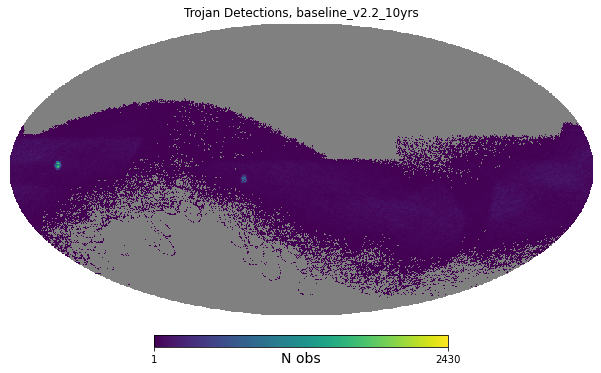

In [8]:
hp.mollview(hpdensity, title='Trojan Detections, baseline_v2.2_10yrs', unit='N obs')

/var/folders/05/z_zc9f654c5dlw06t4s_d68w0000gn/T/ipykernel_15819/3802806192.py:1: RuntimeWarning: invalid value encountered in log10
  hp.mollview(np.log10(hpdensity), title='Trojan Detections, baseline_v2.2_10yrs', unit=' log10 N obs')


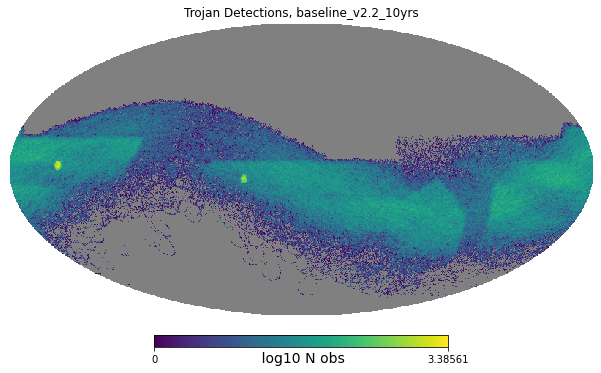

In [9]:
hp.mollview(np.log10(hpdensity), title='Trojan Detections, baseline_v2.2_10yrs', unit=' log10 N obs')

In [10]:
ddfs = ddf_locations()

In [11]:
dist = angularSeparation(ddfs['COSMOS'][0], ddfs['COSMOS'][1], df['ra'].values, df['dec'].values)

In [12]:
inside_rad_deg = np.where(dist < 1.8)[0]


Text(0.5, 1.0, 'baseline_v2.2_10yrs, COSMOS')

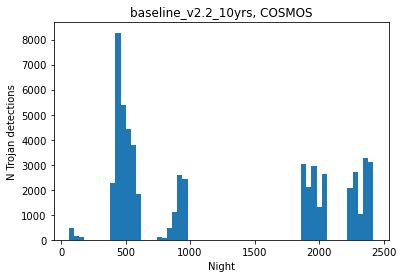

In [19]:
mjds = df['observationStartMJD'].values[inside_rad_deg]
mjds -= survey_start_mjd()
bins = np.arange(mjds.min(), mjds.max(), 40)
_temp = plt.hist(mjds, bins=bins)
plt.xlabel('Night')
plt.ylabel('N Trojan Detections')
plt.title('baseline_v2.2_10yrs, COSMOS')

In [16]:
mjd_zero()

TypeError: 'module' object is not callable